### Importando 
Todos os dados que obtivemos nesse primeiro momento se encontram dentro de um banco de dados AirTable. Para utilizar em nossa analise vamos baixa-lo e armazena-lo localmente como um .json

Utilizamos uma variavel de ambiente que é uma chave para conectar com o airtable. Vá na sua conta do airtable 'Account'.
Na area API pegue sua API Key. Então no seu repo crie um arquivo .env e coloque da seguinte forma:
export AIRTABLE_API_KEY=API_KEY
Sendo no campo API_KEY sua key.

In [1]:
from dotenv import dotenv_values 
config = dotenv_values(".env")
api_key = config['AIRTABLE_API_KEY']

https://airtable.com/appgUg041aeWfcxGc/tblUpku2OvK6Y6FGb/viwSwDZRjL2gi2qiJ?blocks=hide

In [2]:
from pyairtable import Table
table = Table(api_key, 'appgUg041aeWfcxGc', 'tblUpku2OvK6Y6FGb')

In [4]:
import json
listDict = table.all()
listaBrasileirao = []
for i in listDict:
    listaBrasileirao.append(i['fields'])

with open('dataset/listaBrasileirao.json', 'w') as json_file:
    jsonStr = json.dump(listaBrasileirao, json_file, ensure_ascii=False)
    print(jsonStr)


# Analise de dados

Nesse notebook nos buscamos tratar de responder e explorar as seguintes perguntas

1. O time que é campeão vence mais da metade dos jogos? - RESPONDIDO
2. Qual média de vitorias dos times que vencem o campeonato? - RESPONDIDO
4. E os times que fazem menos gols são os que caem? 
5. Qual média de derrotas dos times que foram rebaixados?
7. Os times que vencem os campeonatos são os times que fazem mais gols?

1. Os time que tomam menos gols, ficam em qual zona na tabela?
2. Os times que fazem mais gols, ficam em qual zona na tabela?
3. Os times com mais empates, ficam em qual zona na tabela?
4. Os times que tomam mais gols, ficam em qual zona na tabela?
8. O time com melhor saldo de gols, fica em qual zona da tabela?

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dfBrasileirao = pd.read_json('dataset/listaBrasileirao.json')
dfBrasileirao.head()

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Time,Gols Contra,Gols Pro,Saldo Gols
0,10,38,10,14,14,2016,52,5,87,SãoPaulo,36,44,8
1,3,38,8,10,20,2020,68,6,72,Atlético,45,64,19
2,10,38,7,16,15,2019,52,7,86,Goiás,64,46,-18
3,4,38,8,12,18,2015,62,5,73,SãoPaulo,47,53,6
4,3,38,6,11,21,2014,69,6,92,Internacional,41,53,12


### Pre Analise

In [6]:
dfBrasileirao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Posicao          200 non-null    int64 
 1   Jogos            200 non-null    int64 
 2   Empates          200 non-null    int64 
 3   Derrotas         200 non-null    int64 
 4   Vitorias         200 non-null    int64 
 5   Ano              200 non-null    int64 
 6   Pontos           200 non-null    int64 
 7   Cartao Vermelho  200 non-null    int64 
 8   Cartao Amarelo   200 non-null    int64 
 9   Time             200 non-null    object
 10  Gols Contra      200 non-null    int64 
 11  Gols Pro         200 non-null    int64 
 12  Saldo Gols       200 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 20.4+ KB


In [8]:
dfBrasileirao.describe()

,Posicao,Jogos,Empates,Derrotas,Vitorias,Ano,Pontos,Cartao Vermelho,Cartao Amarelo,Gols Contra,Gols Pro,Saldo Gols
count,200.000000,200.0,200.000000,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000
mean,10.500000,38.0,10.220000,13.89500,13.885000,2016.500000,51.82000,5.195000,87.890000,44.810000,44.780000,-0.03000
std,5.780751,0.0,2.550318,4.41491,4.380378,2.879489,12.70293,2.709925,12.195143,9.400839,11.277745,16.81436
min,1.000000,38.0,4.000000,4.00000,1.000000,2012.000000,15.00000,0.000000,61.000000,22.000000,18.000000,-57.00000
25%,5.750000,38.0,8.000000,11.00000,11.000000,2014.000000,44.00000,3.000000,80.750000,38.000000,37.000000,-9.25000
50%,10.500000,38.0,10.000000,14.00000,13.000000,2016.500000,51.00000,5.000000,87.000000,44.000000,44.000000,-1.00000
75%,15.250000,38.0,12.000000,17.00000,16.250000,2019.000000,59.00000,7.000000,95.000000,50.250000,51.000000,11.00000
max,20.000000,38.0,17.000000,28.00000,28.000000,2021.000000,90.00000,14.000000,121.000000,79.000000,86.000000,49.00000


### 1. O time que é campeão vence mais da metade dos jogos?

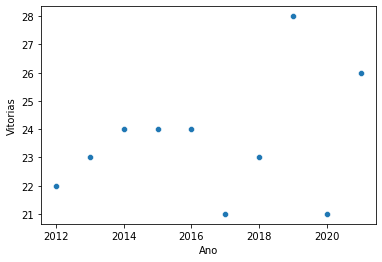

In [9]:
sns.scatterplot(x = 'Ano', y = dfBrasileirao['Vitorias'].where(dfBrasileirao['Posicao'] == 1) ,data=dfBrasileirao)
plt.show()


/Users/joao/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


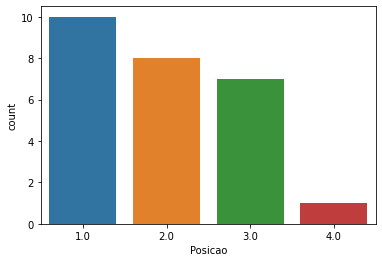

In [11]:
sns.countplot(dfBrasileirao['Posicao'].where(dfBrasileirao['Vitorias'] > 19));

#### Os quatro primeiros times vencem mais da metade dos jogos?

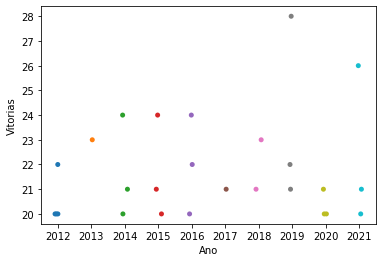

In [12]:
sns.stripplot(x='Ano',y = dfBrasileirao['Vitorias'].where(dfBrasileirao['Vitorias'] > 19), data=dfBrasileirao)
plt.show()

### 2. Qual média de vitorias dos times que vencem o campeonato?

In [13]:
listaBrasileirao['Vitorias'].where(listaBrasileirao['Posicao'] == 1).mean()

23.6

### 3. E os times que fazem menos gols são os que caem?

In [14]:

for n in dfBrasileirao:
    print(n)
dfBrasileirao
menosGolsCadaCampeonato = [dfBrasileirao
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2013  and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2014  and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2015 and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2016  and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2017 and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2018 and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2019 and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2020 and listaBrasileirao['Gols Pro'].min()),
                            # listaBrasileirao.where(listaBrasileirao['Ano'] == 2021 and listaBrasileirao['Gols Pro'].min())
                            ]

print(menosGolsCadaCampeonato)

##plt.hist(x = menosGolsCadaCampeonato['Ano'])

Posicao
Jogos
Empates
Derrotas
Vitorias
Ano
Pontos
Cartao Vermelho
Cartao Amarelo
Time
Gols Contra
Gols Pro
Saldo Gols
[     Posicao  Jogos  Empates  Derrotas  Vitorias   Ano  Pontos  \
0         10     38       10        14        14  2016      52   
1          3     38        8        10        20  2020      68   
2         10     38        7        16        15  2019      52   
3          4     38        8        12        18  2015      62   
4          3     38        6        11        21  2014      69   
..       ...    ...      ...       ...       ...   ...     ...   
195       17     38       15        16         7  2019      36   
196       12     38        4        19        15  2015      49   
197       17     38       12        14        12  2013      44   
198        3     38       11         7        20  2016      71   
199        6     38        8        13        17  2018      59   

     Cartao Vermelho  Cartao Amarelo           Time  Gols Contra  Gols Pro  \
0        

# Analise Futura
Posteirormente, as proximas perguntas que iremos responder serão as seguites:
1. O time que vence o campeonato é o time que mais faz pontos no primeiro ciclo de jogos?
2. O time que mais chuta é o time que mais faz gol?
3. Os 3 primeiros artilheiros do campeonato, refletem no time ficar nas zonas excelentes ou ótimas?
4. Os times que fazem mais gols em um jogo, ficam em qual zona da tabela?
5. Os times que tomam mais gols em um jogo, ficam em qual zona da tabela?
6. O time com mais média de posse de bola, fica em qual zona da tabela?
7. Existe um esquema tatico mais vencedor no campeonato?
8. O time que vence o campeonato, vence mais que os outros dentro e fora de casa?